In [24]:
import pandas as pd
import numpy as np
import networkx as nx
import json
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [8]:
# Load data
package_feats = json.load(open('./dataset/package-features.json'))
project_data = json.load(open("./GithubScrape/Data/40_With_Description/append_dependencies_40_4.json"))

In [11]:
project_data

{'vue-element-admin': ['chalk',
  'axios',
  'babel-eslint',
  'core-js',
  'connect',
  'serve-static',
  'nprogress',
  'babel-plugin-dynamic-import-node',
  'clipboard',
  'dropzone',
  'html-webpack-plugin',
  'vue-template-compiler',
  'husky',
  'sass-loader',
  'jsonlint',
  'path-to-regexp',
  'eslint-plugin-vue',
  'vue-count-to',
  'script-loader',
  '@vue/test-utils',
  'babel-jest',
  'chokidar',
  'vue',
  'autoprefixer',
  'sortablejs',
  'eslint',
  'normalize.css',
  'js-cookie',
  'vuex',
  'svgo',
  'svg-sprite-loader',
  'jszip',
  'lint-staged',
  'plop',
  'file-saver',
  'fuse.js',
  'mockjs',
  'screenfull',
  'vue-router',
  'echarts',
  '@vue/cli-plugin-babel',
  '@vue/cli-plugin-eslint',
  '@vue/cli-plugin-unit-jest',
  '@vue/cli-service',
  'element-ui',
  'runjs',
  'script-ext-html-webpack-plugin',
  'vue-splitpane',
  'vuedraggable',
  'driver.js',
  'tui-editor',
  'codemirror',
  'sass',
  'xlsx'],
 'grafana': ['react',
  'react-dom',
  'rxjs',
  'webpac

In [10]:
# For each project remove dependencies that are not available
def clean_project_data(data, valid):
    for project, deps in data.items():
        data[project] = [p for p in deps.keys() if p in valid]
        
clean_project_data(project_data, package_feats.keys())

In [17]:
def create_package_list(data):
    packages = set()
    for deps in data.values():
        packages.update(deps)
    return list(packages)

18868


In [26]:
def create_ground_truth_matrix(data):
    package_list = create_package_list(project_data)
    package_list.sort()
    project_names = sorted(data.keys())
    
    gt_mat = np.full((len(project_names), len(package_list)), -1)
    
    for i, project in enumerate(project_names):
        for pkg in data[project]:
            if pkg in package_list:
                j = package_list.index(pkg)
                gt_mat[i, j] = 1
                    
    return gt_mat, package_list, project_names
                
ground_truth, package_order, project_order = create_ground_truth_matrix(project_data)

(238, 18868)


In [27]:
print(ground_truth.shape)

(238, 18868)


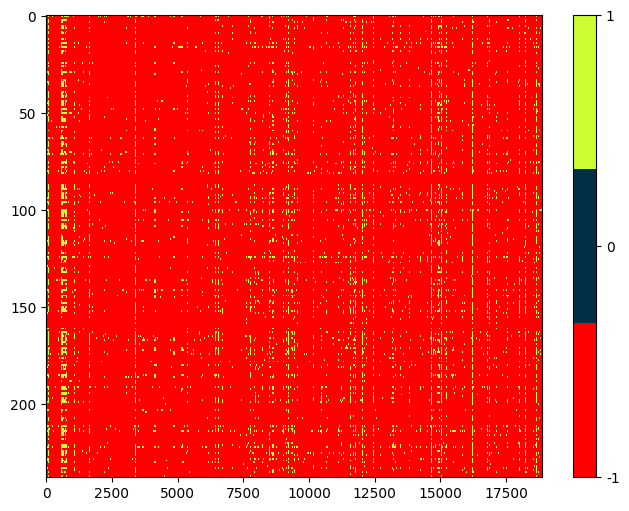

In [38]:
def visualize_matrix(mat, colors=('red', '#023047', '#ccff33')):
    cmap = ListedColormap(colors)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(mat, cmap=cmap, interpolation='nearest', aspect='auto')
    
    cbar = plt.colorbar(ticks=[-1, 0, 1])
    cbar.ax.set_yticklabels(['-1', '0', '1'])
    
visualize_matrix(ground_truth)

In [49]:
np.random.seed(42)  # For reproducibility

# Function to mask a percentage of values
def mask_matrix(matrix, mask_percentage):
    masked_matrix = matrix.copy()
    total_elements = matrix.size
    num_to_mask = int(total_elements * mask_percentage / 100)
    
    # Get random indices to mask
    indices = np.random.choice(total_elements, num_to_mask, replace=False)
    rows, cols = np.unravel_index(indices, matrix.shape)
    
    # Mask selected values
    masked_matrix[rows, cols] = 0  # Replace with 0 (or np.nan if preferred)
    return masked_matrix

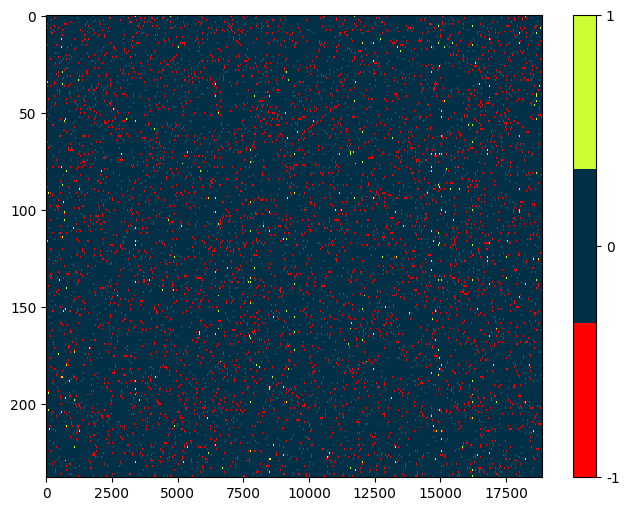

In [50]:
training_matrix = mask_matrix(ground_truth, 95)
visualize_matrix(training_matrix)